# Procesamiento de Lenguaje Natural

## Objetivo 
- Aplicar los conceptos de Procesamiento de Lenguaje Natural aprendidos en esta sesión a nuestro proyecto

En este notebook se llevara la practica de algunas tecnicas de procesamiento de lenguaje natural para datos de tipo no estructurados.

## Carga general de datos

Para obtener nuestras distribuciones, utilizaremos las siguientes librerias:

In [1]:
# Importamos todas las librerias necesarias 
import pandas as pd
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

In [2]:
# Cargamos el dataset
df = pd.read_csv('../Datasets/winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# Agrupamos segun el pais
grouped_country = df.groupby('country')['description'].max()

grouped_country.head()

country
Argentina                 “Cocina” means “the kitchen” in Spanish, and t...
Armenia                   Medium straw in the glass, this wine has a nos...
Australia                 this is a lovely effort and a great value from...
Austria                   “Open, pour, drink” is the message behind Trie...
Bosnia and Herzegovina    Toasted oak and cedar notes meld into lush, ri...
Name: description, dtype: object

Primeramente tendremos que hacer una breve limpieza para los textos

In [4]:
# Hacemos una limpieza de caracteres que no necesitaresmos
grouped_country = grouped_country.str.lower()
grouped_country = grouped_country.str.strip()
grouped_country = grouped_country.str.replace('[^\w\s]', '', regex=True)
grouped_country = grouped_country.str.replace('\d', '', regex=True)
grouped_country = grouped_country.str.replace('\\n', '', regex=True)
grouped_country = grouped_country.dropna()

grouped_country.head()

country
Argentina                 cocina means the kitchen in spanish and this b...
Armenia                   medium straw in the glass this wine has a nose...
Australia                 this is a lovely effort and a great value from...
Austria                   open pour drink is the message behind trie als...
Bosnia and Herzegovina    toasted oak and cedar notes meld into lush rip...
Name: description, dtype: object

Ahora tendremos que separar cada palabra de cada oraciòn para su mejor tratamiento

In [5]:
tokenized = grouped_country.apply(nltk.word_tokenize)

In [6]:
tokenized.head()

country
Argentina                 [cocina, means, the, kitchen, in, spanish, and...
Armenia                   [medium, straw, in, the, glass, this, wine, ha...
Australia                 [this, is, a, lovely, effort, and, a, great, v...
Austria                   [open, pour, drink, is, the, message, behind, ...
Bosnia and Herzegovina    [toasted, oak, and, cedar, notes, meld, into, ...
Name: description, dtype: object

In [7]:
# Sumamos todas las listas para obtener una lista con todas las palabras en nuestro conjunto de datos
# Creamos un objeto Text

all_words = tokenized.sum()
text = nltk.Text(all_words)

text

<Text: cocina means the kitchen in spanish and this...>

Con el siguiente codigo podemos buscar oraciones que con cuerden con alguna palabra que se pueda repetir con frecuencia

In [8]:
text.concordance('aromas', lines=20)

Displaying 13 of 13 matches:
s and a bright acidity yeasty briny aromas are a bit pickled and not very frui
 perfect zippy with natural rubbery aromas this is quite tart and has a person
 outdoor appetizers the interesting aromas include dried flowers citrus and a 
ranny smith apple and bartlett pear aromas it has a very nice mousse and flake
es or sip alone on a hot day yeasty aromas are suggestive of vanilla wafer and
uit and lemon zest this wine offers aromas of rose petal and geranium with a h
ink now stonefruit and yellow apple aromas come with a hint of ham flat and cr
nd ready to drink with fresh grassy aromas and flavors and a subtle character 
and full bodied this has delightful aromas of freshly mowed lawn lemon pith an
d lets out subtle leather and fruit aromas the palate is juicy and fresh with 
p its sleeve vanilla and lemon curd aromas bring nuance and depth to the the c
ot extreme in alcohol this wine has aromas of pomegranate juice and dried cher
herry conserves woody l

Aqui buscaremos algunas palabras que puedran tener un contexto similar a la palabra que pase como argumento

In [9]:
# similar te regresa las palabras que aparecen en contextos similares al argumento

text.similar('fruit')

pineapple melon grapefruit vanilla smoke stonefruit nettle sorrel


###  Análisis estadístico

Ahora para poder hacer el análisis estadísticos del dataset, debemos poder hacer conteos de frecuencia y así poder graficar y poder visualizar mejor estos resultados.

In [10]:
# Utilizamos FreqDist para analizar la distribución de frecuencia de nuestras palabras

freq_dist = nltk.FreqDist(all_words)

print(freq_dist)

<FreqDist with 606 samples and 1646 outcomes>


Para que los resultados no sean afectados necesitamos eliminar esas palabras que se consideran palabras vacias, y se hace de la siguiente manera.

In [11]:
english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist = nltk.FreqDist(all_words_except_stop_words)

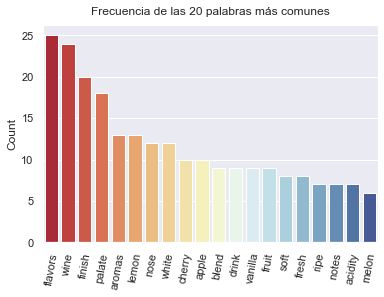

In [12]:
# Podemos visualizar la frecuencia de las 20 palabras más comunes

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))

# for para poder convertir caracteres a numeros, del array anterior
lista_1 = []
flag = False
for  item in most_common_20:
    for i in item:
        if flag:
            lista_1.append(i)
        flag = True
    flag = False        


lista_1 = list(map(int, lista_1))

sns.set(style="darkgrid")
fig = plt.figure()
ax = fig.add_subplot()


sns.barplot(x=most_common_20[:, 0], y=lista_1, ax=ax, palette='RdYlBu');

ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [13]:
# Podemos visualizar la frecuencia de los bigramas más comunes

text = nltk.Text(all_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('on', 'the'): 21, ('the', 'palate'): 15, ('and', 'a'): 11, ('this', 'wine'): 10, ('with', 'a'): 10, ('in', 'the'): 9, ('the', 'finish'): 9, ('flavors', 'of'): 8, ('the', 'nose'): 7, ('drink', 'now'): 6, ...})

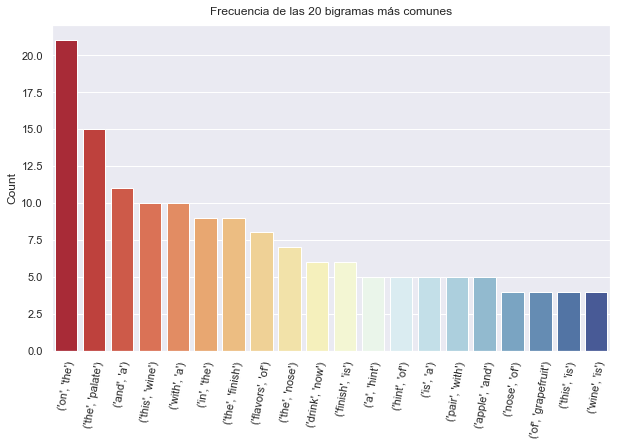

In [14]:

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))), dtype='object')

sns.set(style="darkgrid")
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0], y=most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

Obtencion de histogramas para ver las frecuancias de las palabras y/u oraciones con mayor longitud.

In [15]:
# También podemos generar histogramas para visualizar la frecuencia de longitudes de palabras y oraciones

word_lengths = [len(w) for w in all_words_except_stop_words]

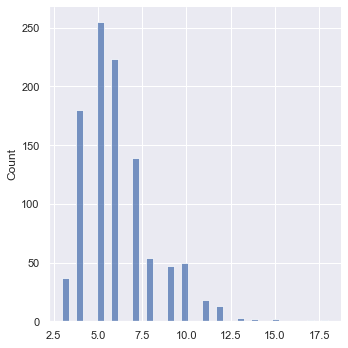

In [16]:
sns.displot(x=word_lengths, kde=False);

Generando una nube de palabras para detectar los temas mas importantes del dataset, mientras mas grande es mas relevante. 

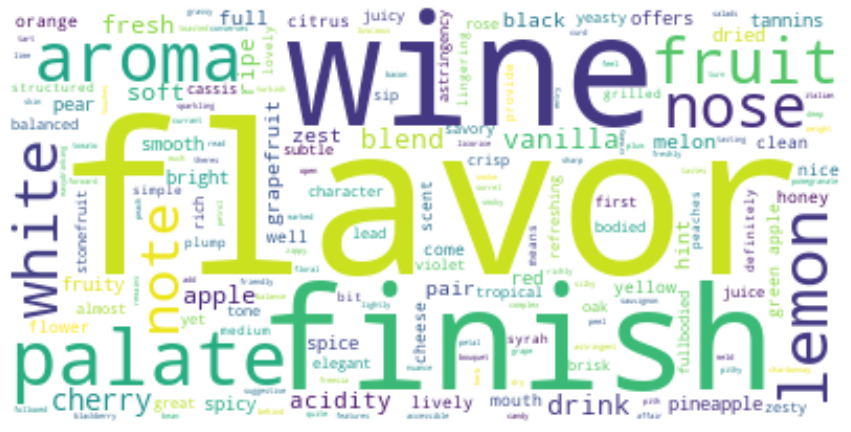

In [17]:

wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()